<a href="https://colab.research.google.com/github/AbhienayaSri9509/7305219509/blob/main/Forest_Fire_Detection_Using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [7]:
#IMPORTING NECESSARY LIBRARIES
import  os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten, Dense , Dropout, Input




In [9]:
# to ensure the gpu is present
physical_devices=tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices)>0:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print('GPU is used')
else:
  print('GPU is not used')

GPU is used


In [12]:
#load and explore the dataset
train_dir='/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir='/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir='/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [14]:
#list all the classes
classes =os.listdir(train_dir)
num_classes=len(classes)

#Display the class naames
print(f'Number of Classes:{num_classes}')
print(f' Classes:{classes}')



Number of Classes:2
 Classes:['fire', 'nofire']


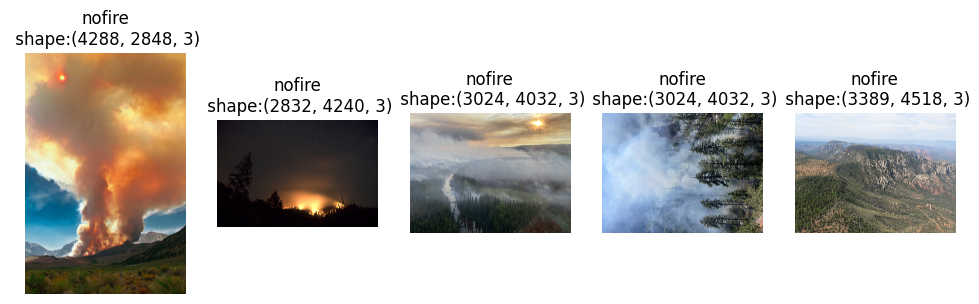

In [17]:
#Lets visualize the images in data set
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]}\n shape:{img.shape}')
  plt.axis('off')
plt.show()